In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

In [7]:
model_var =  ['Year','vhRentaa', 'HousingCost_HighImpactHH','HousingCost_LowImpactHH', 'HousingCost_MediumImpactHH', \
              'HousingCost_Unknown / Not Declared', 'CrConditions_NChronic', 'CrConditions_Unknown / Not Declared', \
              'CrConditions_YChronic', 'HLimitations_NoLimited','HLimitations_NoSerLimitedG_limitado', \
              'HLimitations_SerLimited','HLimitations_Unknown / Not declared', 'MDClothes_No affordable', \
              'MDClothes_No, other reason','MDClothes_Unknown / Not Declared', 'MDClothes_Yes', 'MDShoes_No affordable', \
              'MDShoes_No, other reason', 'MDShoes_Unknown / Not Declared', 'MDShoes_Yes', 'MDFriends_No affordable',\
              'MDFriends_No, other reason', 'MDFriends_Unknown / Not Declared', 'MDFriends_Yes', 'MDLeisure_No affordable', \
              'MDLeisure_No, other reason', 'MDLeisure_Unknown / Not Declared', 'MDLeisure_Yes', 'MDSelf_No affordable',\
              'MDSelf_No, other reason', 'MDSelf_Unknown / Not Declared', 'MDSelf_Yes', 'MDInternet_No affordable',\
              'MDInternet_No, other reason', 'MDInternet_Unknown / Not Declared', 'MDInternet_Yes', 'LifeSatisfaction0',\
              'LifeSatisfaction1', 'LifeSatisfaction2', 'AREMonth','CHealth', 'vhPobreza_vhPobreza_No','vhPobreza_vhPobreza_Yes']


df = pd.read_csv('./Files/ECV_2004_2018.csv.gz', sep = ';', compression='gzip', usecols = model_var).dropna()
df_model = df[(df['Year'] == 2018) | (df['Year'] == 2013)]

df_model.head()

,Year,HHId,HHHolidays,HHFood,HHReserves,HHPhone,HHTV,HHComputer,HHWashMachine,HHCar,AREMonth,HousingCost,HHHeath,HHnMembers,HHConsUnits,vhRentaa,vhRentaAIa,vhPobreza,vhMATDEP,Year_HHid,Region,Habitat,IndID,Sex,YBirht,MarStatus,WorStatus,FStudies,CHealth,CrConditions,HLimitations,MDClothes,MDShoes,MDFriends,MDLeisure,MDSelf,MDInternet,FFTense,FFDown,FFCalm,FFDepressed,FFHappy,WSOovsat,WBSrelations,WBSowntime,WSBeconomy,Year_IndID,AgeNumeric,HHHolidays_No,HHHolidays_Unknown / Not Declared,HHHolidays_Yes,HHFood_No,HHFood_Unknown / Not Declared,HHFood_Yes,HHReserves_No,HHReserves_Unknown / Not Declared,HHReserves_Yes,HHPhone_No,HHPhone_No_otros,HHPhone_Unknown / Not Declared,HHPhone_Yes,HHTV_No,HHTV_No_otros,HHTV_Unknown / Not Declared,HHTV_Yes,HHComputer_No,HHComputer_No_otros,HHComputer_Unknown / Not Declared,HHComputer_Yes,HHWashMachine_No,HHWashMachine_No_otros,HHWashMachine_Unknown / Not Declared,HHWashMachine_Yes,HHCar_No,HHCar_No_otros,HHCar_Unknown / Not Declared,HHCar_Yes,HousingCost_HighImpactHH,HousingCost_LowImpactHH,HousingCost_MediumImpactHH,HousingCost_Unknown / Not Declared,HHHeath_No,HHHeath_Unknown / Not Declared,HHHeath_Yes,vhPobreza_Unknown / Not Declared,vhPobreza_vhPobreza_No,vhPobreza_vhPobreza_Yes,vhMATDEP_vhMATDEP_No,vhMATDEP_vhMATDEP_Yes,Sex_Hombre,Sex_Mujer,MarStatus_Casado,MarStatus_Divorciado,MarStatus_Separado,MarStatus_Soltero,MarStatus_Uknown / Prefer not to say,MarStatus_Viudo,WorStatus_EmployeeFT,WorStatus_EmployeePT,WorStatus_HHoldKeeper,WorStatus_OtherNonWorking,WorStatus_Retired,WorStatus_SEmployedFT,WorStatus_SEmployedPT,WorStatus_Student,WorStatus_Uknown / Not declared,WorStatus_Unemployed,FStudies_<Primaria,FStudies_EdSuperior,FStudies_OrGeneral,FStudies_OrProfesional,FStudies_Primaria,FStudies_Secundaria1,FStudies_Secundaria2,FStudies_SecundariaNoOb,FStudies_Uknown,CrConditions_NChronic,CrConditions_Unknown / Not Declared,CrConditions_YChronic,HLimitations_NoLimited,HLimitations_NoSerLimitedG_limitado,HLimitations_SerLimited,HLimitations_Unknown / Not declared,MDClothes_No affordable,"MDClothes_No, other reason",MDClothes_Unknown / Not Declared,MDClothes_Yes,MDShoes_No affordable,"MDShoes_No, other reason",MDShoes_Unknown / Not Declared,MDShoes_Yes,MDFriends_No affordable,"MDFriends_No, other reason",MDFriends_Unknown / Not Declared,MDFriends_Yes,MDLeisure_No affordable,"MDLeisure_No, other reason",MDLeisure_Unknown / Not Declared,MDLeisure_Yes,MDSelf_No affordable,"MDSelf_No, other reason",MDSelf_Unknown / Not Declared,MDSelf_Yes,MDInternet_No affordable,"MDInternet_No, other reason",MDInternet_Unknown / Not Declared,MDInternet_Yes,LifeSatisfaction0,LifeSatisfaction1,LifeSatisfaction2
267835,2013,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,HighImpactHH,Yes,4,2.3,88450.00,92796.64,vhPobreza_No,vhMATDEP_No,2013_1,País Vasco,Small,101,Mujer,1964,Casado,EmployeeFT,Uknown,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,4.0,5.0,2.0,5.0,2.0,8.0,8.0,8.0,8.0,2013_101,49,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8.0,19.241614,8.000000
267836,2013,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,HighImpactHH,Yes,4,2.3,88450.00,92796.64,vhPobreza_No,vhMATDEP_No,2013_1,País Vasco,Small,102,Mujer,1993,Soltero,Student,Uknown,2.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,2.0,5.0,3.0,5.0,2.0,8.0,8.0,8.0,8.0,2013_102,20,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8.0,19.241614,8.000000
267837,2013,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,HighImpactHH,Yes,4,2.3,88450.00,92796.64,vhPobreza_No,vhMATDEP_No,2013_1,País Vasco,Small,103,Hombre,1961,Casado,EmployeeFT,Uknown,2.0,NChronic,NoLimited,Yes,Yes,Yes,"No, other reason",Yes,Yes,3.0,5.0,2.0,5.0,2.0,7.0,7.0,5.0,7.0,2013_103,52,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1

# a) Linear Regression

In [41]:
# Librerías
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Modelo con variable de Satisfacción con la vida 0

In [89]:
# Versión con la variable 1 de satisfacción con la vida
# Variables 

X = df_model[['vhRentaa','HousingCost_HighImpactHH','CrConditions_NChronic','HLimitations_NoLimited', 'MDInternet_Yes',
     'MDSelf_Yes', 'MDLeisure_Yes',  'MDFriends_Yes', 'MDShoes_Yes', 'MDClothes_Yes','CHealth','AREMonth']]

y1 = df_model['LifeSatisfaction0']

# Train - Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,y1, test_size = 0.2, random_state = 55)


# Instancia
reg1 = LinearRegression()

# Fit del modelo
reg1.fit(X_train1, y_train1)

# Predicción de los valores en test
pred1=reg.predict(X_test1)

##### Revisión de importancia de los coeficientes

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.10954
Feature: 2, Score: -0.19704
Feature: 3, Score: 0.00883
Feature: 4, Score: -0.12417
Feature: 5, Score: 0.25589
Feature: 6, Score: 0.25476
Feature: 7, Score: 0.31672
Feature: 8, Score: 0.27460
Feature: 9, Score: 0.45283
Feature: 10, Score: -0.39028
Feature: 11, Score: 0.31099


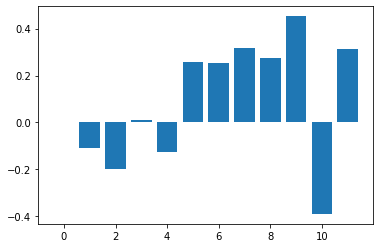

In [94]:
# valor de los coeficientes
importance1 = reg1.coef_

# resumen de la importancia
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# gráfico de la importancia
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

In [99]:
import statsmodels.api as sm

In [100]:
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y1,X_1).fit()
model.pvalues

const                        0.000000e+00
vhRentaa                     3.631958e-07
HousingCost_HighImpactHH     2.741821e-19
CrConditions_NChronic        7.563613e-34
HLimitations_NoLimited       9.232865e-01
MDInternet_Yes               1.833914e-15
MDSelf_Yes                   1.208383e-69
MDLeisure_Yes                1.184590e-67
MDFriends_Yes                7.313237e-72
MDShoes_Yes                  8.700853e-12
MDClothes_Yes               1.935084e-106
CHealth                      0.000000e+00
AREMonth                     0.000000e+00
dtype: float64

In [103]:
model.pvalues

const                        0.000000e+00
vhRentaa                     3.631958e-07
HousingCost_HighImpactHH     2.741821e-19
CrConditions_NChronic        7.563613e-34
HLimitations_NoLimited       9.232865e-01
MDInternet_Yes               1.833914e-15
MDSelf_Yes                   1.208383e-69
MDLeisure_Yes                1.184590e-67
MDFriends_Yes                7.313237e-72
MDShoes_Yes                  8.700853e-12
MDClothes_Yes               1.935084e-106
CHealth                      0.000000e+00
AREMonth                     0.000000e+00
dtype: float64

##### Modelo con variable de Satisfacción con la vida 2

In [95]:
# Versión con la variable 2 de satisfacción con la vida
# Variables 

X = df_model[['vhRentaa','HousingCost_HighImpactHH','CrConditions_NChronic','HLimitations_NoLimited', 'MDInternet_Yes',
     'MDSelf_Yes', 'MDLeisure_Yes',  'MDFriends_Yes', 'MDShoes_Yes', 'MDClothes_Yes','CHealth','AREMonth']]

y2 = df_model['LifeSatisfaction2']

# Train - Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 55)


# Instancia
reg2 = LinearRegression()

# Fit del modelo
reg2.fit(X_train2, y_train2)

# Predicción de los valores en test
pred2=reg2.predict(X_test2)

* ### Resultados

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Modelo con variable de Satisfacción con la vida 0

In [97]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-pred1))))
print('MAE: ' + str(mean_absolute_error(y_test1,pred1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg.predict((X_test1)),y_test1))))
print('correlation coefficient: ' + str(np.corrcoef(reg.predict(X_test1), y_test1)[0][1]))
print('R2_score: ' + str(r2_score(y_test1,pred1,multioutput='variance_weighted')))

Modelo con variable de Satisfacción 0:
MAPE: 0.9527107691280112
MAE: 0.952710769128013
RMSE: 1.226204775844032
correlation coefficient: 0.5398886754336679
R2_score: 0.28586862739326013


##### Modelo con variable de Satisfacción con la vida 2

In [98]:
# Modelo con variable de satisfacción 2 
print('Modelo con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred2))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred2,multioutput='variance_weighted')))

Modelo con variable de Satisfacción 2:
MAPE: 0.9424494799264159
MAE: 0.9424494799264169
RMSE: 1.2221773020122606
correlation coefficient: 0.5762832705269355
R2_score: 0.33168728232748146


# b) K - Neighbours

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

##### Modelo con variable de Satisfacción con la vida 0

In [55]:
%%time
regk1 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk1.fit(X,y1)

CPU times: user 13min 41s, sys: 16.3 s, total: 13min 58s
Wall time: 14min 8s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
       238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291, 292, 293, 294, 295, 29

In [56]:
regk1.best_params_

{'n_neighbors': 296}

In [58]:
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
regk_1 = KNeighborsRegressor(n_neighbors=296)

# Fit del modelo
regk_1.fit(X_train1, y_train1)

# Predicción de los valores en test
predK1=regk_1.predict(X_test1)

##### Modelo con variable de Satisfacción con la vida 2

In [52]:
%%time
regk2 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk2.fit(X,y2)

CPU times: user 2min 30s, sys: 46.9 ms, total: 2min 30s
Wall time: 2min 32s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_abso

In [53]:
regk2.best_params_

{'n_neighbors': 99}

In [66]:
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
regk_2 = KNeighborsRegressor(n_neighbors=296)

# Fit del modelo
regk_2.fit(X_train2, y_train2)

# Predicción de los valores en test
predk2=regk_2.predict(X_test2)

* ### Resultados

##### Modelo con variable de Satisfacción con la vida 0

In [62]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predK1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predK1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_1.predict((X_test1)),y_test1))))

Modelo con variable de Satisfacción 0:
MAPE: 1.0927656740969356
MAE: 1.0927656740969347
RMSE: 1.404846593976122


##### Modelo con variable de Satisfacción con la vida 2

In [74]:
# Modelo con variable de satisfacción 2 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predk2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predk2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_2.predict((X_test2)),y_test2))))

Modelo con variable de Satisfacción 0:
MAPE: 1.111643285209481
MAE: 1.1116432852094804
RMSE: 1.4356440725126527


# c) Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

##### Modelo con variable de Satisfacción con la vida 0

In [76]:
%%time

regd1 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd1.fit(X,y1)

CPU times: user 6min 5s, sys: 93.8 ms, total: 6min 6s
Wall time: 6min 6s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 4,  5,  6, 

In [77]:
regd1.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [84]:
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
regd_1 = DecisionTreeRegressor(min_samples_split = 7,
                             max_depth = 6,
                             min_samples_leaf = 4)

# Fit del modelo
regd_1.fit(X_train1, y_train1)

# Predicción de los valores en test
predd1=regd_1.predict(X_test1)

##### Modelo con variable de Satisfacción con la vida 2

In [79]:
%%time

regd2 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd2.fit(X,y2)

CPU times: user 6min 10s, sys: 62.5 ms, total: 6min 10s
Wall time: 6min 10s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 4,  5,  6, 

In [80]:
regd2.best_params_

{'max_depth': 7, 'min_samples_leaf': 13, 'min_samples_split': 4}

In [87]:
regd2.best_params_
regd2.best_params_
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
regd_2 = DecisionTreeRegressor(min_samples_split = 7,
                             max_depth = 13,
                             min_samples_leaf = 4)

# Fit del modelo
regd_2.fit(X_train2, y_train2)

# Predicción de los valores en test
predd2=regd_2.predict(X_test2)

* ### Resultados

##### Modelo con variable de Satisfacción con la vida 0

In [85]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predd1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predd1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_1.predict((X_test1)),y_test1))))

Modelo con variable de Satisfacción 0:
MAPE: 0.9542535535533782
MAE: 0.9542535535533786
RMSE: 1.2283549657430544


##### Modelo con variable de Satisfacción con la vida 2

In [88]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predd2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predd2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_2.predict((X_test2)),y_test2))))

Modelo con variable de Satisfacción 0:
MAPE: 0.9839248918768911
MAE: 0.9839248918768888
RMSE: 1.284059559639994


# d) Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [106]:
# Hiperparametros
# n_estimators - number of intances - Number of trees
n_estimators = [50,100,200,400,600]

# max_depth: Maximun number of levels in the tree
max_depth = [10,20,30,40,50]

# min_sample_split: Min number of samples to split a node
min_samples_split = [20,30,40,50,60]

# min_sample_leaf: Min number of samples at each leaf node
min_samples_leaf = [20,30,40,50,60]

# min_sample_leaf: Min number of samples at each leaf node
grid_param = {'n_estimators':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [107]:
rscv = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = grid_param, 
                        n_iter = 100, cv = 5, verbose = 2, random_state = 33, 
                        n_jobs = -1)

##### Modelo con variable de Satisfacción con la vida 0

In [108]:
%%time

rscv.fit(X,y1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 53.9min finished


CPU times: user 29.2 s, sys: 4.89 s, total: 34.1 s
Wall time: 54min 19s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [109]:
rscv.best_params_

{'n_estimators': 600,
 'min_samples_split': 40,
 'min_samples_leaf': 50,
 'max_depth': 10}

In [112]:
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
rdfreg1 = RandomForestRegressor(n_estimators = 600, 
                               min_samples_split = 40, 
                               min_samples_leaf = 50, 
                               max_depth = 10)
# Fit del modelo
rdfreg1.fit(X_train1, y_train1)

# Predicción de los valores en test
predrdf1=rdfreg1.predict(X_test1)

##### Modelo con variable de Satisfacción con la vida 2

In [ ]:
%%time

rscv.fit(X,y2)

In [114]:
# Versión con la variable 1 de satisfacción con la vida
# Variables - ya especificadas anteriormente

# Instancia
rdfreg2 = RandomForestRegressor(n_estimators = 600, 
                               min_samples_split = 40, 
                               min_samples_leaf = 50, 
                               max_depth = 10)
# Fit del modelo
rdfreg2.fit(X_train2, y_train2)

# Predicción de los valores en test
predrdf2=rdfreg2.predict(X_test2)

##### Modelo con variable de Satisfacción con la vida 0

In [113]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predrdf1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predrdf1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg1.predict((X_test1)),y_test1))))

Modelo con variable de Satisfacción 0:
MAPE: 0.9439105104575266
MAE: 0.9439105104575283
RMSE: 1.2160796962355676


##### Modelo con variable de Satisfacción con la vida 2

In [115]:
# Modelo con variable de satisfacción 0 
print('Modelo con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predrdf2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predrdf2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg2.predict((X_test2)),y_test2))))

Modelo con variable de Satisfacción 1:
MAPE: 0.9382846831604001
MAE: 0.9382846831603935
RMSE: 1.2185120046908475
